In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import cartopy.crs as ccrs
import cartopy.feature as cfeature
warnings.filterwarnings('ignore')
%config inlineBackend.figure_format = 'retina'

In [2]:
df1 = pd.read_csv(r"C:\Users\Hp\Downloads\Data.csv")
df1

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


In [3]:
NCAP_Funding = pd.read_csv(r"C:\Users\Hp\Downloads\NCAP_Funding.csv")
NCAP_Funding

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91
...,...,...,...,...,...,...,...,...
112,113,West Bengal,Kolkata,6,-,-,6.00,19
113,114,West Bengal,Howrah,-,5,-,5.00,19
114,115,West Bengal,Haldia,-,3,-,3.00,19
115,116,West Bengal,Durgapur,-,3,-,3.00,19


In [4]:
State_data  = pd.read_csv(r"C:\Users\Hp\Downloads\State_data.csv")
State_data

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252
5,Tamil Nadu,72147030,130058
6,Rajasthan,68548437,342239
7,Karnataka,61095297,191791
8,Gujarat,60439692,196024
9,Andhra Pradesh,49577103,162975


**Spatial aggregation**

Q1) Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?


In [5]:
avg_PM_for_states = df1.groupby('state')["PM2.5"].mean()
state_with_max_PM = avg_PM_for_states.idxmax()
Value = avg_PM_for_states[state_with_max_PM]
print(f"State with maximum PM2.5 is {state_with_max_PM} and the amount is {Value}")

State with maximum PM2.5 is Delhi and the amount is 104.1009176780069


Q2) Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [6]:
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
# The pd.to_datetime() function in Pandas is used to convert a column or a list of date-like strings into datetime objects
df_2023 = df1[df1["Timestamp"].dt.year==2023] 
df_2023

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
1229151,2023-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1229152,2023-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
1229153,2023-01-01,"Adarsh Nagar, Jaipur - RSPCB",52.502842,85.579053,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
1229154,2023-01-01,"Airoli, Navi Mumbai - MPCB",NaN,NaN,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
1229155,2023-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1433911,2023-12-31,"Worli, Mumbai - MPCB",47.100625,136.581481,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1433912,2023-12-31,"Yamunapuram, Bulandshahr - UPPCB",67.694737,127.273684,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1433913,2023-12-31,"Yerramukkapalli, Kadapa - APPCB",NaN,NaN,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1433914,2023-12-31,"Zero Point GICI, Gangtok - SSPCB",10.938437,25.018125,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


In [7]:
hazardous_df = df_2023[df_2023["PM2.5"]>300]
hazardous_df_per_state_per_day = hazardous_df.groupby('state')['PM2.5'].count()
print(f"{hazardous_df_per_state_per_day.idxmax()} had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023")
# The value_counts() method is used to count the occurrences of unique values
# The count() method in Pandas is used to count the number of non-null values for each column or group.

Delhi had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023


Q3) Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

In [8]:
variability_df = df_2023.groupby('state')['PM2.5'].std() / df_2023.groupby('state')['PM2.5'].mean()
state_with_highest_variability = variability_df.idxmax()
print(f"The state with highest variablility is {state_with_highest_variability}")

The state with highest variablility is Sikkim


For measuring variability, we have used coefficient of variance because standard deviation is not enough for comparing data for different scales. Coefficient of variance is better because it normalizes variability.

Q4) Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [9]:
df_covid = df1[(df1['Timestamp'].dt.year == 2020) | (df1['Timestamp'].dt.year == 2021)]
df_covid.groupby('state')['PM2.5'].mean().idxmin()
print(f" {df_covid.groupby('state')['PM2.5'].mean().idxmin()} has the lowest average PM2.5 levels during the Covid period")

 Mizoram has the lowest average PM2.5 levels during the Covid period


**Temporal Aggregration**

Q1) Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.


In [10]:
df_aug_2020 = df1[(df1['Timestamp'].dt.year == 2020) & (df1['Timestamp'].dt.month == 8)]
row = df_aug_2020["PM2.5"].idxmax() 
df_aug_2020.loc[row,'station']
print(f"{df_aug_2020.loc[row,'station']} recorded the highest value of PM 2.5 for the month Aug of 2020")

Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB recorded the highest value of PM 2.5 for the month Aug of 2020


Q2) For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.


In [11]:
df_2018 = df1[df1["Timestamp"].dt.year==2018]
Winter_df = df_2018[(df_2018["Timestamp"].dt.month == 12) | (df_2018["Timestamp"].dt.month == 1) | (df_2018["Timestamp"].dt.month == 2)]
Summer_df = df_2018[(df_2018['Timestamp'].dt.month==3) | (df_2018['Timestamp'].dt.month==4) | (df_2018['Timestamp'].dt.month==5)] 
monsoon_df = df_2018[(df_2018['Timestamp'].dt.month==6) | (df_2018['Timestamp'].dt.month==7) | (df_2018['Timestamp'].dt.month==8) | (df_2018['Timestamp'].dt.month==9)]

In [12]:
filtered_station_winter_df = Winter_df[Winter_df['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']
filtered_station_Summer_df = Summer_df[Summer_df['station']== 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']
filtered_station_monsoon_df = monsoon_df[monsoon_df['station']=='Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']

In [13]:
Avg_PM_For_Lal_Bahadhur_shastri_station_winter = filtered_station_winter_df['PM2.5'].mean()
print(Avg_PM_For_Lal_Bahadhur_shastri_station_winter)

67.4923443634478


In [14]:
Avg_PM_For_Lal_Bahadhur_shastri_station_Summer = filtered_station_Summer_df['PM2.5'].mean()
print(Avg_PM_For_Lal_Bahadhur_shastri_station_Summer)

nan


In [15]:
Avg_PM_For_Lal_Bahadhur_shastri_station_monsoon = filtered_station_monsoon_df['PM2.5'].mean()
print(Avg_PM_For_Lal_Bahadhur_shastri_station_monsoon)

34.42519611317571


[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?

Winter typically experiences the highest pollution levels because cold air moves more slowly than warm air. The air remain in place for a longer period, leading to increased PM levels.  Additionally, the use of fuel for heating and transportation during this season further contributes to the pollution levels.

Q3) Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:


a) Calculate the monthly average PM2.5 for weekdays and weekends separately


In [16]:
df_2021 = df1[df1['Timestamp'].dt.year == 2021]

In [17]:

filtered_df_2021 = df_2021[df_2021['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']


filtered_df_2021['Day of the Week'] = filtered_df_2021['Timestamp'].dt.dayofweek
filtered_df_2021['Months of the Year'] = filtered_df_2021['Timestamp'].dt.month


filtered_df_2021['Weekday'] = filtered_df_2021['Day of the Week'] < 5
filtered_df_2021['Weekend'] = filtered_df_2021['Day of the Week'] >= 5 


Avg_PM_monthly_weekend = filtered_df_2021.groupby(['Months of the Year', 'Weekend'])['PM2.5'].mean().reset_index()
Avg_PM_monthly_weekend_True = Avg_PM_monthly_weekend[Avg_PM_monthly_weekend['Weekend'] == True].reset_index(drop=True)


Avg_PM_monthly_weekday = filtered_df_2021.groupby(['Months of the Year', 'Weekday'])['PM2.5'].mean().reset_index()
Avg_PM_monthly_weekday_True = Avg_PM_monthly_weekday[Avg_PM_monthly_weekday['Weekday'] == True].reset_index(drop=True)

Avg_PM_monthly_weekday_True, Avg_PM_monthly_weekend_True


(    Months of the Year  Weekday      PM2.5
 0                    1     True  69.115419
 1                    2     True  62.541201
 2                    3     True  51.942440
 3                    4     True  38.790324
 4                    5     True  14.986212
 5                    6     True   9.534043
 6                    7     True   7.769066
 7                    8     True        NaN
 8                    9     True        NaN
 9                   10     True  55.484170
 10                  11     True  48.326451
 11                  12     True  74.505459,
     Months of the Year  Weekend      PM2.5
 0                    1     True  52.131611
 1                    2     True  53.946216
 2                    3     True  53.167747
 3                    4     True  41.405150
 4                    5     True  17.104372
 5                    6     True   7.695810
 6                    7     True   8.652231
 7                    8     True        NaN
 8                    9     Tru

In [18]:
filtered_df_2021 = df_2021[df_2021['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']
filtered_df_2021['Day of the Week'] = filtered_df_2021['Timestamp'].dt.dayofweek
filtered_df_2021['Months of the Year'] = filtered_df_2021['Timestamp'].dt.month
filtered_df_2021['Weekday'] = filtered_df_2021['Day of the Week'] < 5
filtered_df_2021['Weekend'] = filtered_df_2021['Day of the Week'] >= 5  
# Monday = 0 to Sunday = 6
Avg_PM_monthly_weekend = filtered_df_2021.groupby(['Months of the Year', 'Weekend'])['PM2.5'].mean().reset_index()
Avg_PM_monthly_weekend_True = Avg_PM_monthly_weekend[Avg_PM_monthly_weekend['Weekend'] == True].reset_index()

Avg_PM_monthly_weekday = filtered_df_2021.groupby(['Months of the Year', 'Weekday'])['PM2.5'].mean().reset_index()
Avg_PM_monthly_weekday_True = Avg_PM_monthly_weekday[Avg_PM_monthly_weekday['Weekday'] == True].reset_index()

Avg_PM_monthly_weekday_True, Avg_PM_monthly_weekend_True

(    index  Months of the Year  Weekday      PM2.5
 0       1                   1     True  69.115419
 1       3                   2     True  62.541201
 2       5                   3     True  51.942440
 3       7                   4     True  38.790324
 4       9                   5     True  14.986212
 5      11                   6     True   9.534043
 6      13                   7     True   7.769066
 7      15                   8     True        NaN
 8      17                   9     True        NaN
 9      19                  10     True  55.484170
 10     21                  11     True  48.326451
 11     23                  12     True  74.505459,
     index  Months of the Year  Weekend      PM2.5
 0       1                   1     True  52.131611
 1       3                   2     True  53.946216
 2       5                   3     True  53.167747
 3       7                   4     True  41.405150
 4       9                   5     True  17.104372
 5      11                   6

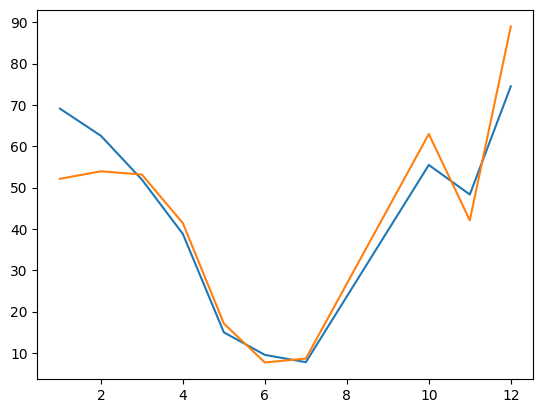

In [19]:
x_axis = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Avg_PM_monthly_weekday_True = Avg_PM_monthly_weekday_True.interpolate(method='linear')
Avg_PM_monthly_weekend_True = Avg_PM_monthly_weekend_True.interpolate(method='linear')
y1_axis = Avg_PM_monthly_weekday_True['PM2.5']
Y2_axis= Avg_PM_monthly_weekend_True['PM2.5']
plt.plot(x_axis,y1_axis)
plt.plot(x_axis,Y2_axis)
plt.show()

**Spatio-temporal aggregation**

Q1) For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?


In [20]:
df_2022 = df1[(df1['Timestamp'].dt.year == 2022)]
monsoon_general_df_2022 = df_2022[(df_2022['Timestamp'].dt.month==6) | (df_2022['Timestamp'].dt.month==7) | (df_2022['Timestamp'].dt.month==8) | (df_2022['Timestamp'].dt.month==9)]
summer_general_df_2022 = df_2022[(df_2022['Timestamp'].dt.month==3) | (df_2022['Timestamp'].dt.month==4) | (df_2022['Timestamp'].dt.month==5)] 

Total_PM_monsoon_2022 = monsoon_general_df_2022.groupby('state')['PM2.5'].mean()
Total_PM_summer_2022 = summer_general_df_2022.groupby('state')['PM2.5'].mean()

Percentage_change_2022 = ((Total_PM_monsoon_2022 - Total_PM_summer_2022) / Total_PM_summer_2022) * 100

In [21]:
State = Percentage_change_2022.idxmin()
Value = Percentage_change_2022[State]

print(f"The percentage change is maximum difference (very low PM2.5 for monsoon as compared to summer) was for the state {State} and the value is {Value:.3f}")


The percentage change is maximum difference (very low PM2.5 for monsoon as compared to summer) was for the state Assam and the value is -61.176


Q2) Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?
 

In [22]:
def Season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9]:
        return "Monsoon"
    else:
        return "No need"

def days(day):
    if day in range(0,5):
        return "weekday"
    else:
        return "weekend"

df1["season"] = df1["Timestamp"].dt.month.apply(Season)
df1["day"] = df1["Timestamp"].dt.weekday.apply(days)

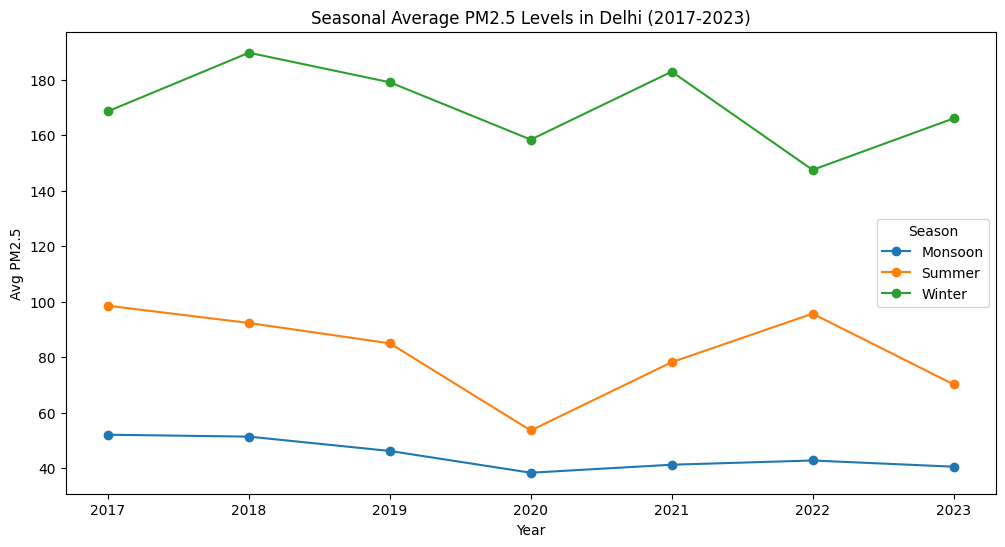

In [23]:
avg_delhi = {}

for yr in range(2017, 2024):  
    avg_delhi[yr] = (df1[(df1["state"] == "Delhi") & (df1["Timestamp"].dt.year == yr)].groupby("season")["PM2.5"].mean().reset_index())
combined_data = pd.concat(avg_delhi, names=["Year"]).reset_index()
combined_data = combined_data[combined_data["season"] != "No need"]
pivot_data = combined_data.pivot(index = "Year", columns = "season", values = "PM2.5")
plt.figure(figsize = (12, 6))
for season in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[season], marker='o', label=season)
plt.xlabel("Year")
plt.ylabel("Avg PM2.5")
plt.title("Seasonal Average PM2.5 Levels in Delhi (2017-2023)")
plt.legend(title = "Season")

Q3) Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)


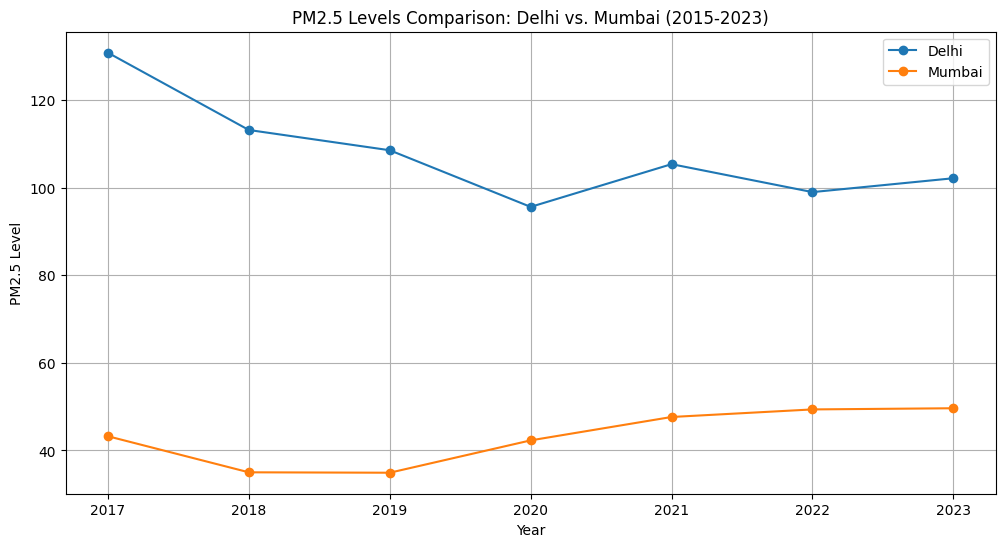

In [24]:
mumbai_tseries = {}
delhi_tseries = {}

for yr in range(2015, 2024):  
    delhi_tseries[yr] = (df1[(df1["state"] == "Delhi") & (df1["Timestamp"].dt.year == yr)]["PM2.5"].mean())
for yr in range(2015, 2024):  
    mumbai_tseries[yr] = (df1[(df1["city"] == "Mumbai") & (df1["Timestamp"].dt.year == yr)]["PM2.5"].mean())
delhi = pd.DataFrame.from_dict(delhi_tseries, orient="index", columns=["PM2.5"])
mumbai = pd.DataFrame.from_dict(mumbai_tseries, orient="index", columns=["PM2.5"])
plt.figure(figsize=(12, 6))
plt.plot(delhi.index, delhi['PM2.5'], label='Delhi', marker='o')
plt.plot(mumbai.index, mumbai['PM2.5'], label='Mumbai', marker='o')

plt.title('PM2.5 Levels Comparison: Delhi vs. Mumbai (2015-2023)')
plt.xlabel('Year')
plt.ylabel('PM2.5 Level')
plt.legend()
plt.grid(True)
plt.show()

**Population-Based [3 Marks]**

Q1) Which state in India has the highest number of monitoring stations relative to its population? 

In [25]:
State_with_number_of_monitoring_stations = df1.groupby('state')['station'].count()
State_with_number_of_monitoring_stations_with_population = pd.merge(State_data,State_with_number_of_monitoring_stations,left_on = "State" , right_on = "state")

In [26]:
Index_as_state = State_with_number_of_monitoring_stations_with_population.set_index("State")
number_of_monitoring_stations_per_population = Index_as_state["station"]/Index_as_state["Population"]
number_of_monitoring_stations_per_population.idxmax()

'Chandigarh'

In [27]:
Index_as_state["Per Capita"] = Index_as_state["station"]/Index_as_state["Population"]
Index_as_state

,Population,Area (km2),station,Per Capita
State,,,,
Uttar Pradesh,199812341,240928,163977,0.000821
Maharashtra,112374333,307713,270828,0.002410
Bihar,104099452,94163,98979,0.000951
West Bengal,91276115,88752,45930,0.000503
Madhya Pradesh,72626809,308252,81573,0.001123
Tamil Nadu,72147030,130058,83988,0.001164
Rajasthan,68548437,342239,130890,0.001909
Karnataka,61095297,191791,121842,0.001994
Gujarat,60439692,196024,49317,0.000816


Q2) Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

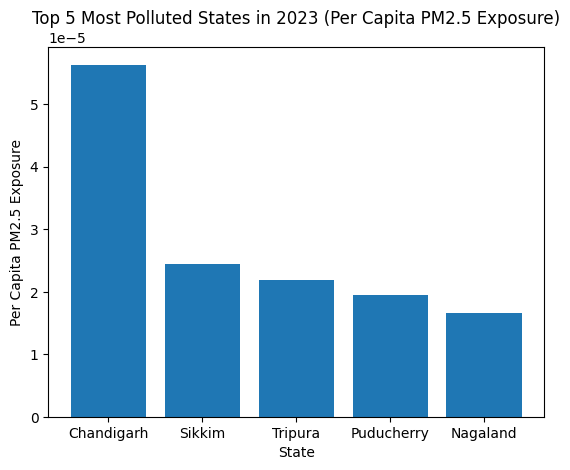

In [28]:
df_2023_station_count = df_2023.groupby('state')['station'].count()
state_pm25_total = df_2023.groupby('state')['PM2.5'].mean()                               

df_merged = pd.merge(state_pm25_total, df_2023_station_count, on='state')
df_merged = pd.merge(df_merged, State_data[['State', 'Population']], left_on='state', right_on='State')
df_merged['per_capita_PM2.5'] = df_merged['PM2.5'] / df_merged['Population']
top5_states = df_merged.nlargest(5, 'per_capita_PM2.5')
plt.bar(top5_states['State'], top5_states['per_capita_PM2.5'])
plt.xlabel('State')
plt.ylabel('Per Capita PM2.5 Exposure')
plt.title('Top 5 Most Polluted States in 2023 (Per Capita PM2.5 Exposure)')
plt.show()

Q3) Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
X-axis: Population density (people per square kilometer).
Y-axis: Average PM2.5 concentration.
Use a scatter plot to show the relationship, where each point represents a state.


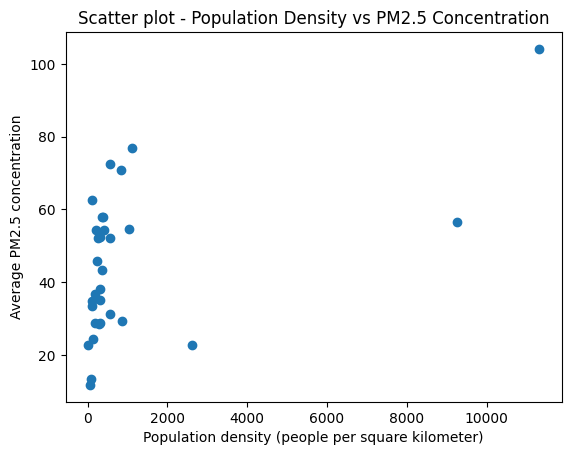

In [29]:
State_data["Population Density"] = State_data["Population"]/State_data["Area (km2)"]
Avg_pm25_concentration_per_State = df1.groupby('state')['PM2.5'].mean()

merged_dataset = pd.merge(State_data, Avg_pm25_concentration_per_State, left_on='State',right_on='state')


plt.xlabel("Population density (people per square kilometer)")
plt.ylabel("Average PM2.5 concentration")
plt.title("Scatter plot - Population Density vs PM2.5 Concentration")
plt.scatter(merged_dataset["Population Density"],merged_dataset['PM2.5'])
plt.show()

**Area Based**

Q1) Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
X-axis: States.
Y-axis: PM2.5 concentration per square kilometer.
Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.

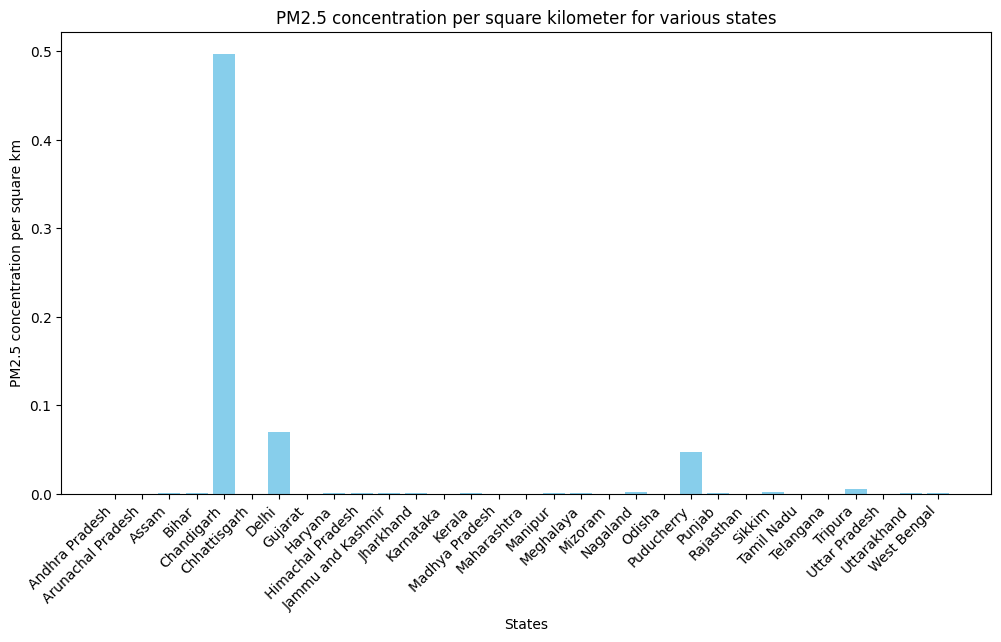

In [30]:
total_pm25_per_state = df1.groupby('state')['PM2.5'].mean()


df_merged = pd.merge(total_pm25_per_state, State_data, left_on='state',right_on="State")
df_merged['PM2.5_per_sqkm'] = df_merged['PM2.5'] / df_merged['Area (km2)']
plt.figure(figsize=(12, 6))
plt.bar(df_merged['State'], df_merged['PM2.5_per_sqkm'], color='skyblue')
plt.xlabel('States')
plt.ylabel('PM2.5 concentration per square km')
plt.title('PM2.5 concentration per square kilometer for various states')
plt.xticks(rotation=45, ha='right')
plt.show()

Chandigarh is our Answer

Q2) Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.


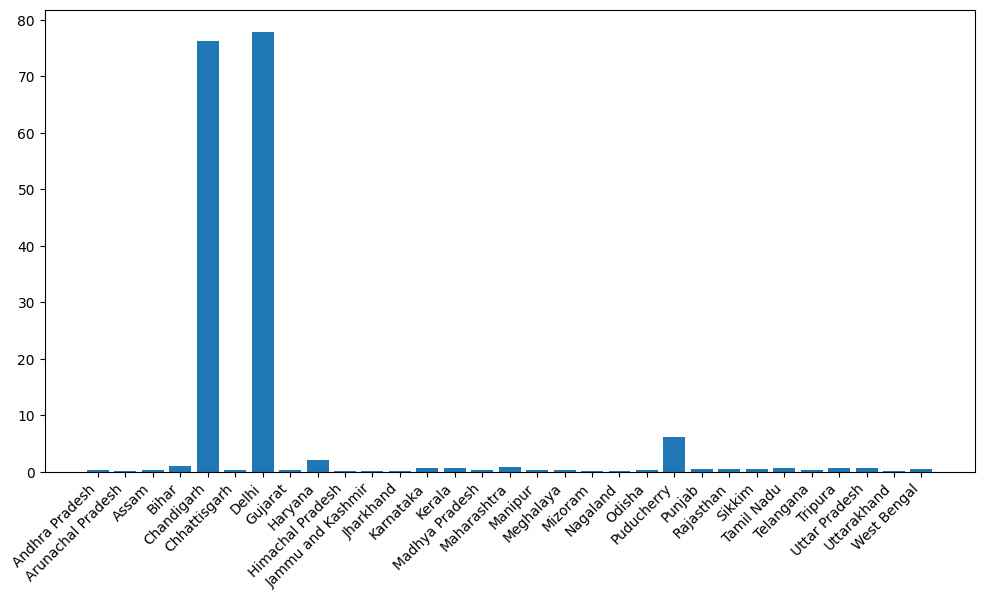

In [31]:
State_with_number_of_monitoring_stations = df1.groupby('state')['station'].count()
df_merged_2 = pd.merge(State_with_number_of_monitoring_stations, State_data , left_on="state", right_on="State")
df_merged_2["Total number of monitoring stations per square kilometer"] = df_merged_2["station"]/df_merged_2["Area (km2)"]
plt.figure(figsize=(12,6))
plt.bar(df_merged_2["State"],df_merged_2["Total number of monitoring stations per square kilometer"])
plt.xticks(rotation=45,ha='right')
plt.show()

Q3) Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.

In [32]:
df_2021_avg_pm25 = df_2021.groupby('state')["PM2.5"].mean()
print(State_data.loc[State_data["State"]=="Maharashtra"])
print(df_2021_avg_pm25['Maharashtra'])

print(State_data.loc[State_data["State"]=="Madhya Pradesh"])
print(df_2021_avg_pm25['Madhya Pradesh'])

         State  Population  Area (km2)  Population Density
1  Maharashtra   112374333      307713          365.192023
46.44004417107664
            State  Population  Area (km2)  Population Density
4  Madhya Pradesh    72626809      308252          235.608557
47.095951831498965


This shows negative correlation between population density and pollution level which is quite suprising thing.  Typically, higher population density is associated with increased pollution. This could be attributed to factors such as stricter environmental regulations, better pollution control measures.

**FUNDING BASED**

Q1) Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.


In [33]:
NCAP_Funding['Amount released during FY 2021-22'] = pd.to_numeric(NCAP_Funding['Amount released during FY 2021-22'].replace('-',0))
funded_states_2021 = NCAP_Funding[NCAP_Funding['Amount released during FY 2021-22'] > 0]['State'].unique()
not_funded_states_2021 = NCAP_Funding[NCAP_Funding['Amount released during FY 2021-22'] == 0]['State'].unique()
print("States that received NCAP funding in 2021:\n")
print(funded_states_2021,"\n")
NCAP_Funding_states = NCAP_Funding['State'].unique()
not_funded_states_2021 = np.setdiff1d(NCAP_Funding_states, funded_states_2021)
print("State that did not receive NCAP Funding in 2021:\n")
print(not_funded_states_2021)

States that received NCAP funding in 2021:

['Andhra Pradesh' 'Bihar' 'Chandigarh' 'Delhi' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Karnataka' 'Madhya Pradesh' 'Maharashtra' 'Nagaland'
 'Odisha' 'Telangana' 'Uttar Pradesh' 'Uttarakhand'] 

State that did not receive NCAP Funding in 2021:

['Assam' 'Chhattisgarh' 'Gujarat' 'Jharkhand' 'Meghalaya' 'Punjab'
 'Rajasthan' 'Tamil Nadu' 'West Bengal']


In [34]:
df1['NCAP_Funded'] = 'Non-Funded'

df1.loc[df1['state'].isin(funded_states_2021), 'NCAP_Funded'] = 'Funded'

df1['PM2.5'] = pd.to_numeric(df1['PM2.5'])

avg_pm25_by_funding = df1.groupby('NCAP_Funded')['PM2.5'].mean()

print("Average PM2.5 levels based on NCAP funding status:")
print(avg_pm25_by_funding)

Average PM2.5 levels based on NCAP funding status:
NCAP_Funded
Funded        62.227358
Non-Funded    52.650627
Name: PM2.5, dtype: float64


Q2) Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?


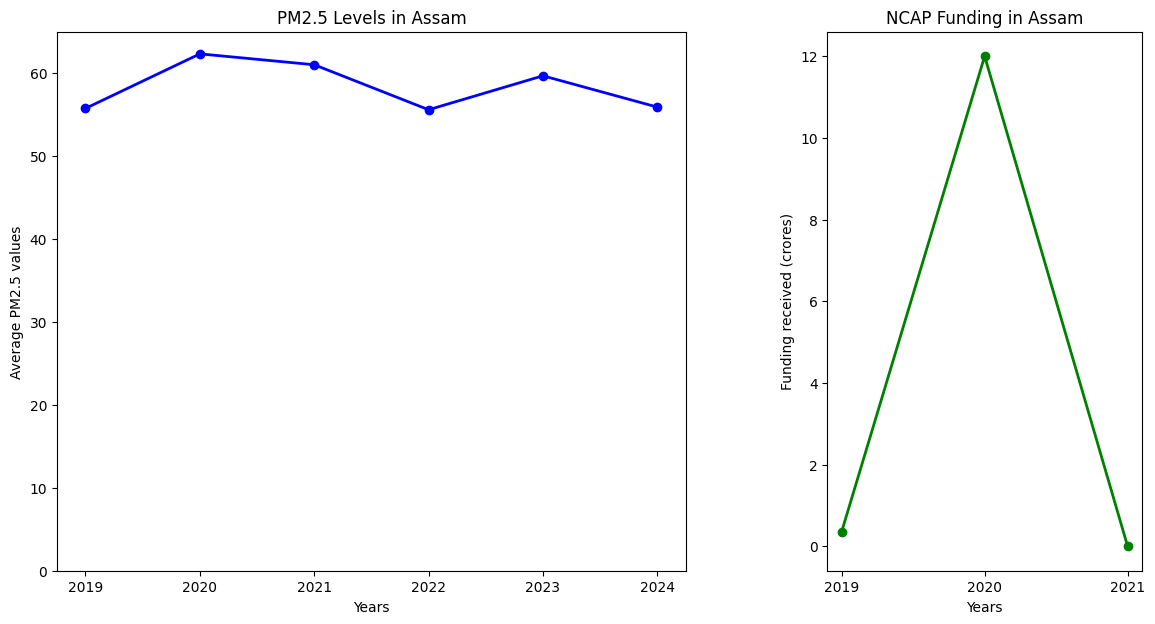

In [35]:
import matplotlib.gridspec as gridspec

df1['Timestamp'] = pd.to_datetime(df1['Timestamp'], errors='coerce')


assam_pol = df1[(df1['state'] == 'Assam') & 
                (df1['Timestamp'].dt.year >= 2019)].groupby(
                pd.Grouper(key='Timestamp', freq='YS'))['PM2.5'].mean()


assam_funds = NCAP_Funding[NCAP_Funding['State'] == 'Assam'][
    ['Amount released during FY 2019-20', 
     'Amount released during FY 2020-21', 
     'Amount released during FY 2021-22']]


assam_funds = assam_funds.astype(str) 
assam_funds = assam_funds.apply(lambda x: x.str.replace(r'[^0-9.]', '', regex=True))  
assam_funds = assam_funds.apply(pd.to_numeric) 


assam_funds = assam_funds.fillna(0)


assam_funds = assam_funds.sum()


assam_pol.index = assam_pol.index.year
assam_funds.index = [2019, 2020, 2021]

fig = plt.figure(figsize=(14, 7))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])


ax0 = plt.subplot(gs[0])
ax0.plot(assam_pol, marker='o', linestyle='-', color='b', linewidth=2)
ax0.set_xticks(ticks=[2019, 2020, 2021, 2022, 2023, 2024])
ax0.set_xlabel('Years')
ax0.set_ylabel('Average PM2.5 values')
ax0.set_title('PM2.5 Levels in Assam')
ax0.set_ylim(0, 65)


ax1 = plt.subplot(gs[1])
ax1.plot(assam_funds.index, assam_funds.values, marker='o', linestyle='-', color='g', linewidth=2)
ax1.set_xticks(ticks=[2019, 2020, 2021])
ax1.set_xlabel('Years')
ax1.set_ylabel('Funding received (crores)')
ax1.set_title('NCAP Funding in Assam')

plt.subplots_adjust(wspace=0.3)
plt.show()


Q3) Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.


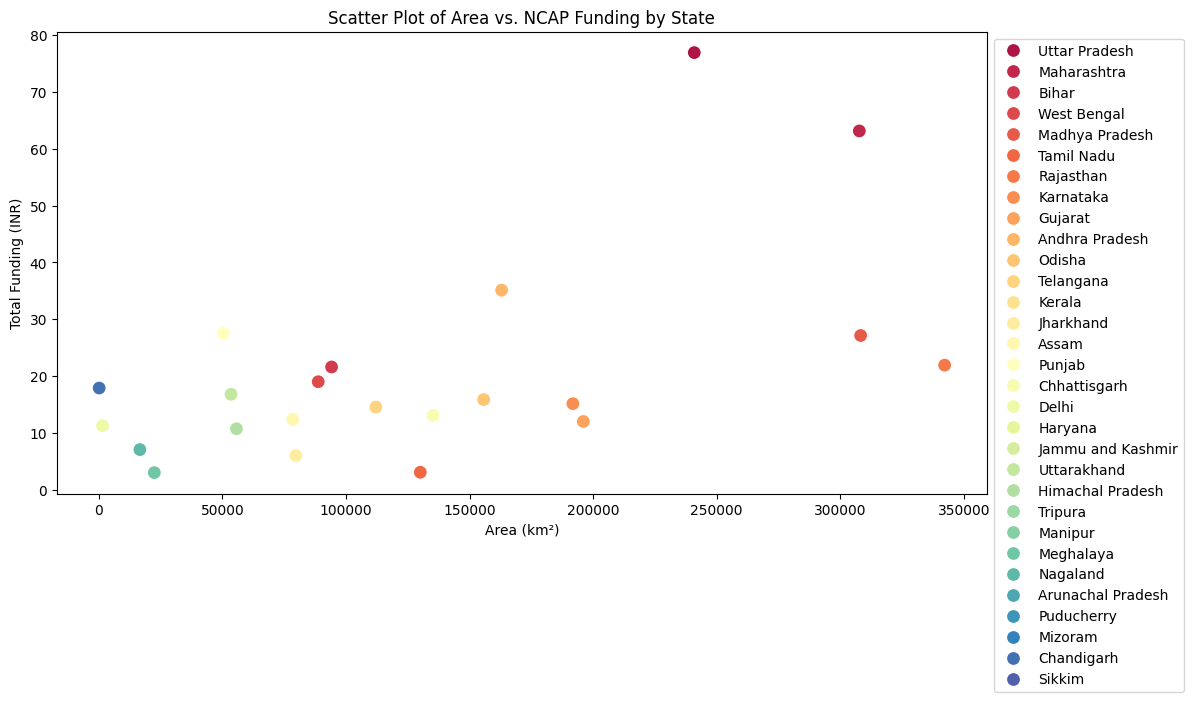

In [36]:
NCAP_Funding[["Amount released during FY 2019-20", "Amount released during FY 2020-21", "Amount released during FY 2021-22"]] = (
    NCAP_Funding[["Amount released during FY 2019-20", "Amount released during FY 2020-21", "Amount released during FY 2021-22"]]
    .replace("-", 0)
    .fillna(0)
    .apply(pd.to_numeric)
)

NCAP_Funding["Total_Funding"] = NCAP_Funding[["Amount released during FY 2019-20", "Amount released during FY 2020-21", "Amount released during FY 2021-22"]].sum(axis=1)


total_funding_per_state = NCAP_Funding.groupby("State")["Total_Funding"].sum().reset_index()

area_funding = pd.merge(State_data, total_funding_per_state, on="State", how="left")


if "NCAP_Funded" in area_funding.columns:
    area_funding = area_funding.drop(columns=["NCAP_Funded"])

plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=area_funding["Area (km2)"], 
    y=area_funding["Total_Funding"], 
    hue=area_funding["State"], 
    palette="Spectral", 
    s=100
)

plt.xlabel("Area (km²)")
plt.ylabel("Total Funding (INR)")
plt.title("Scatter Plot of Area vs. NCAP Funding by State")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


**Miscellaneous Questions**

Q1) For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [37]:
df_2023.groupby('city')['PM2.5'].mean().idxmax()

'Darbhanga'

In [38]:
df_2023_polluted_city = df_2023[df_2023['city']=='Darbhanga']
df_2023_polluted_city = df_2023_polluted_city.dropna(subset=['PM2.5'])
df_bool = (df_2023_polluted_city['PM2.5']>300)
True_count = df_bool.sum()
False_count = len(df_bool)-True_count
Percentage_days = (True_count / len(df_bool) )*100
print(Percentage_days)

23.076923076923077


Q2) Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

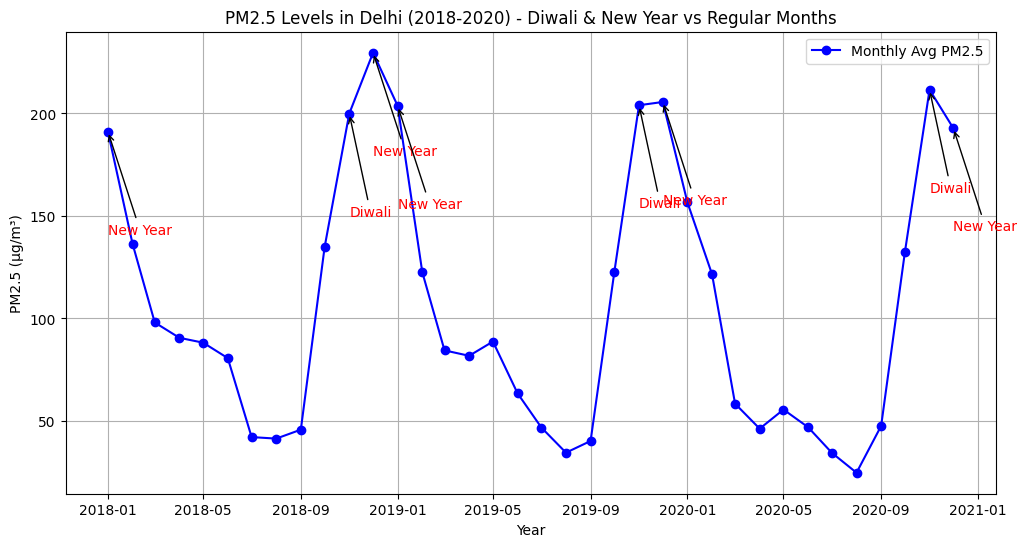

In [39]:
df1["Timestamp"] = pd.to_datetime(df1["Timestamp"])
delhi_data = df1[df1["city"] == "Delhi"].copy()
delhi_data["Year"] = delhi_data["Timestamp"].dt.year
delhi_data["Month"] = delhi_data["Timestamp"].dt.month
delhi_2018_2020 = delhi_data[(delhi_data["Year"] >= 2018) & (delhi_data["Year"] <= 2020)]

diwali_months = [10, 11]
new_year_months = [12, 1]
monthly_avg_pm25 = delhi_2018_2020.groupby(["Year", "Month"])["PM2.5"].mean().reset_index()

spike_threshold = monthly_avg_pm25["PM2.5"].mean() + monthly_avg_pm25["PM2.5"].std()  
spike_data = monthly_avg_pm25[(monthly_avg_pm25["PM2.5"] > spike_threshold) &
                              (monthly_avg_pm25["Month"].isin(diwali_months + new_year_months))]

monthly_avg_pm25["Year"] = monthly_avg_pm25["Year"].astype(int)
monthly_avg_pm25["Month"] = monthly_avg_pm25["Month"].astype(int)
monthly_avg_pm25["Date"] = pd.to_datetime(monthly_avg_pm25["Year"].astype(str) + "-" + monthly_avg_pm25["Month"].astype(str) + "-01")

spike_data["Year"] = spike_data["Year"].astype(int)
spike_data["Month"] = spike_data["Month"].astype(int)
spike_data["Date"] = pd.to_datetime(spike_data["Year"].astype(str) + "-" + spike_data["Month"].astype(str) + "-01")
spike_data["Festival"] = spike_data["Month"].apply(lambda x: "Diwali" if x in diwali_months else "New Year")

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_avg_pm25["Date"], monthly_avg_pm25["PM2.5"], marker="o", linestyle="-", color="blue", label="Monthly Avg PM2.5")

for _, row in spike_data.iterrows():
    label_offset = 50 if row["Festival"] == "Diwali Spike" else -50
    ax.annotate(row["Festival"], xy=(row["Date"], row["PM2.5"]),
                xytext=(row["Date"], row["PM2.5"] + label_offset),
                arrowprops=dict(facecolor='blue', arrowstyle="->"), fontsize=10, color="red")

ax.set_xlabel("Year")
ax.set_ylabel("PM2.5 (µg/m³)")
ax.set_title("PM2.5 Levels in Delhi (2018-2020) - Diwali & New Year vs Regular Months")

ax.legend()
plt.grid()
plt.show()

Q3) Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends

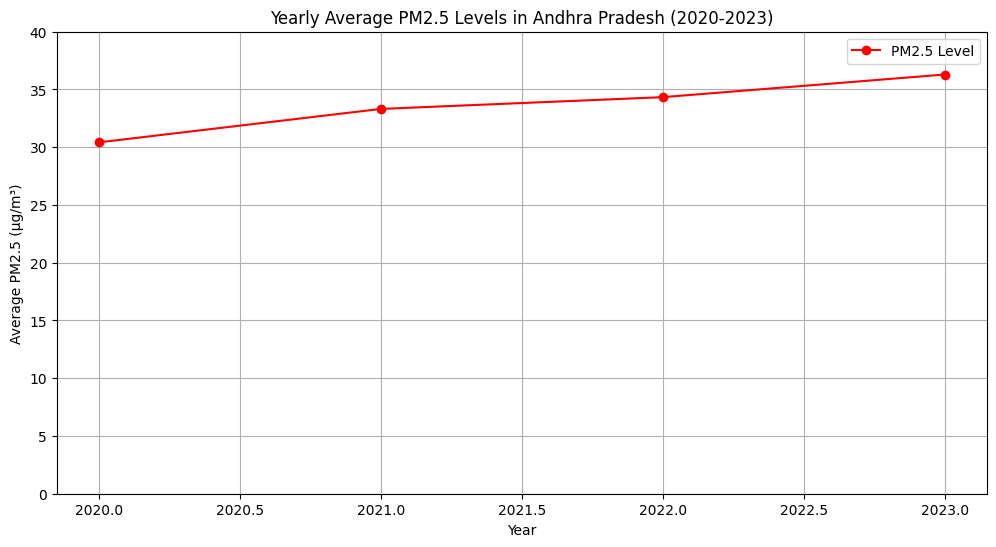

Year
2020    30.425130
2021    33.316491
2022    34.334527
2023    36.294259
Name: PM2.5, dtype: float64


In [40]:
NCAP_Funding["Amount released during FY 2020-21"] = pd.to_numeric(
    NCAP_Funding["Amount released during FY 2020-21"].replace("-", "0")
)

state_funding_2020 = NCAP_Funding.groupby("State")["Amount released during FY 2020-21"].sum()
highest_funded_state = state_funding_2020.idxmax()

df1["Timestamp"] = pd.to_datetime(df1["Timestamp"], format="%Y-%m-%d")

state_pollution_df = df1[df1["state"] == highest_funded_state]
state_pollution_df["Year"] = state_pollution_df["Timestamp"].dt.year
yearly_pm25 = state_pollution_df.groupby("Year")["PM2.5"].mean()
yearly_pm25 = yearly_pm25.loc[2020:2023]

plt.figure(figsize=(12, 6))
plt.plot(yearly_pm25.index, yearly_pm25.values, marker="o", linestyle="-", color="r", label="PM2.5 Level")

plt.xlabel("Year")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title(f"Yearly Average PM2.5 Levels in {highest_funded_state} (2020-2023)")

plt.grid(True)
plt.legend()
plt.ylim(0,40)
plt.show()
print(yearly_pm25)

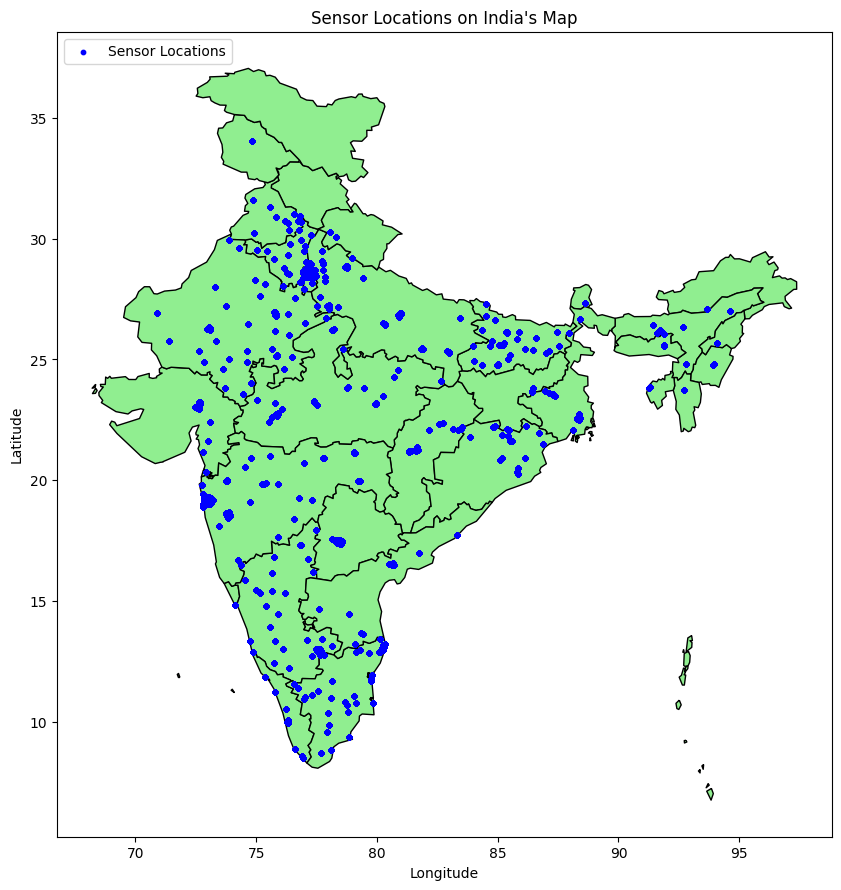

In [43]:
import geopandas as gpd
india_map = gpd.read_file("C:\\Users\\Hp\\Downloads\\india-polygon.shp")

req_data = df1[df1['latitude'].notnull()]
gdf_sensors = gpd.GeoDataFrame(req_data, geometry=gpd.points_from_xy(req_data["longitude"], req_data["latitude"]))
gdf_sensors.set_crs(india_map.crs, inplace=True)
fig, ax = plt.subplots(figsize=(10, 12))
india_map.plot(ax=ax, color="lightgreen", edgecolor="black")
gdf_sensors.plot(ax=ax, color="blue", markersize=10, label="Sensor Locations")
plt.legend()
plt.title("Sensor Locations on India's Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc='upper left')
plt.show()

Tell us something new [1 Mark]
Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers. 


The dataset has a high percentage of missing values, with more than 50 percent PM2.5 and PM10. Additionally, location data (latitude, longitude, city, state) has 3.92% missing values, impacting geographical analysis. Such gaps can skew results and weaken policy decisions on air quality. Addressing these missing values is crucial for accurate and effective data-driven policymaking.